In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [153]:
df_cpu = pd.read_csv("time_memory_cpu.txt", header=0, sep=", ", engine='python')
df_gpu = pd.read_csv("time_memory_gpu.txt", header=0, sep=", ", engine='python')
dfs = [df_cpu, df_gpu]

k = 10
ns = np.arange(2, max(df_cpu.shape[0], df_gpu.shape[0])+2)

for df in dfs:
    df['n'] = ns[0:df.shape[0]]
    df['nvariables'] = (df.n**2 * k).astype('int32')
    df['memory'] /= (1024 * 1024) # convert to MB


Text(382090, 4.5, '(412090, 30)')

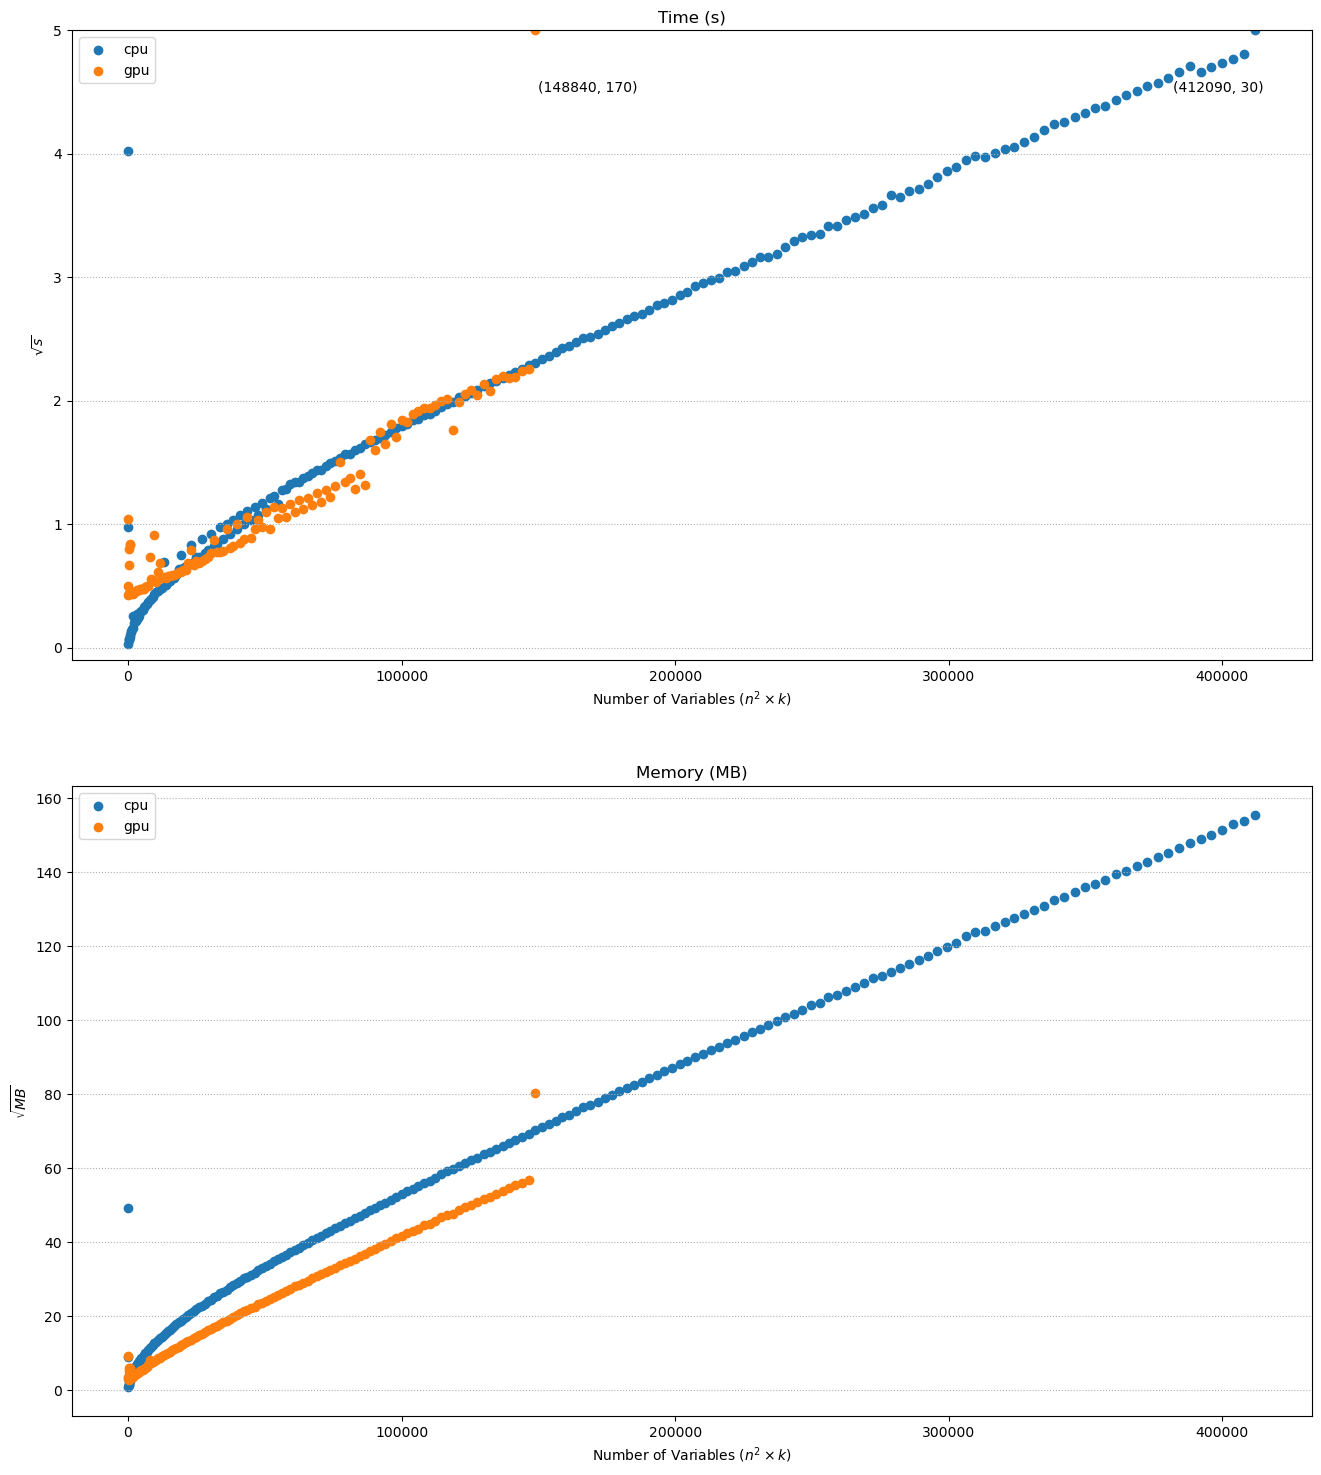

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(16, 18))

yscale = ['linear', 'linear']

plots = ["time", "memory"]
titles = ["Time (s)", "Memory (MB)"]
labels = ['cpu', 'gpu']
xlabels = [r"$\sqrt{s}$", r"$\sqrt{MB}$"]

for i, ax in enumerate(axs):
    if i == 0:
        for j, df in enumerate(dfs):    
            ax.scatter(df.nvariables, np.sqrt(np.clip(df[plots[i]], 0, 25)), label=labels[j])
    else:
        for j, df in enumerate(dfs):
            ax.scatter(df.nvariables, np.sqrt(df[plots[i]]), label=labels[j])
    
    
    ax.set_yscale(yscale[i])
    ax.set_title(titles[i])
    ax.set_xlabel(r"Number of Variables $(n \times k)$")
    ax.set_ylabel(xlabels[i])
    ax.legend(loc="upper left")
    ax.grid(which="both", axis="y", ls=":")

# dealing with outliers
axs[0].set_ylim(-0.1, 5.0)
outlier_gpu = (df_gpu.nvariables.iloc[-1], int(df_gpu.time.iloc[-1]))
outlier_cpu = (df_cpu.nvariables.iloc[-1], int(df_cpu.time.iloc[-1]))
axs[0].annotate(f"{outlier_gpu}", (outlier_gpu[0]+1000, 4.5))
axs[0].annotate(f"{outlier_cpu}", (outlier_cpu[0]-30000, 4.5))


In [403]:
fig.savefig("time_memory_plots.png")